## DATA IMPORT

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score

In [3]:
df = pd.read_csv('address_cleaned.csv')
df

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Activo,Egresado_Egresado,Egresado_Retirado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
157,Bootcamp en Data Science y Machine Learning en...,gmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,Bootcamp en Data Science y Machine Learning en...,hotmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
df["Egresado_Activo"].value_counts()

0.0    142
1.0     18
Name: Egresado_Activo, dtype: int64

Se eliminara la columna de egresados activos porque no existe una correlacion con el la columna objetivo. 

In [5]:
df = df.drop(df.loc[df["Egresado_Activo"] == 1].index)

In [6]:
df["Egresado_Activo"].value_counts()

0.0    142
Name: Egresado_Activo, dtype: int64

In [7]:
df1=df.drop(columns=["Egresado_Activo","Egresado_Retirado"])
df1.head()

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Egresado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0


In [8]:
df1.shape

(142, 15)

In [9]:
df1.isna().sum()

Entrenamiento                     0
Email                             0
Precios US                        0
Ubicacion                         0
Incluye pasantia                  0
Metodo de pago                    0
Estatus laboral                   0
Razon de eleccion del bootcamp    0
Proveedores de bootcamp           0
Horario de los bootcamps          0
Egresado_Egresado                 0
Primer contacto_Instagram         0
Primer contacto_WhatsApp          0
Condiciones de pago_Completo      0
Condiciones de pago_Cuotas        0
dtype: int64

## TRAIN TEST SPLIT

In [10]:
from sklearn.model_selection import train_test_split

X = df1.drop('Egresado_Egresado', axis=1)
y = df1['Egresado_Egresado']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# Primero, dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Luego, dividimos el conjunto de prueba en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Verificar los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", len(X_train))
print("Tamaño del conjunto de validación (X_val):", len(X_val))
print("Tamaño del conjunto de prueba (X_test):", len(X_test))
print("Tamaño del conjunto de entrenamiento (y_train):", len(y_train))
print("Tamaño del conjunto de validación (y_val):", len(y_val))
print("Tamaño del conjunto de prueba (y_test):", len(y_test))

Tamaño del conjunto de entrenamiento (X_train): 99
Tamaño del conjunto de validación (X_val): 21
Tamaño del conjunto de prueba (X_test): 22
Tamaño del conjunto de entrenamiento (y_train): 99
Tamaño del conjunto de validación (y_val): 21
Tamaño del conjunto de prueba (y_test): 22


In [11]:
X_test.shape

(22, 14)

In [12]:
X_train.shape

(99, 14)

## PREPROCESING

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [14]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
#Pipe
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)
X_valid_processed = col_transformer.transform(X_val)

## Modelos

### Modelos Regresion Logistica

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot

In [16]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Create pipeline
logreg_pipe = make_pipeline(logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train_processed,y_train)
#Score
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.8585858585858586
0.7727272727272727


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Penalizaciones

<AxesSubplot:>

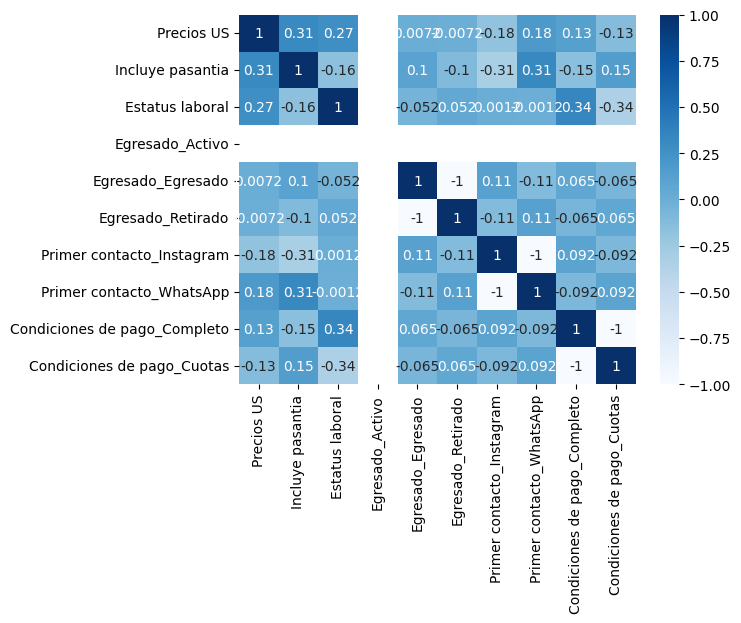

In [17]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

{0.0001: 0.18181818181818182,
 0.001: 0.18181818181818182,
 0.01: 0.18181818181818182,
 0.1: 0.8181818181818182,
 1: 0.8181818181818182,
 10: 0.8181818181818182,
 100: 0.7727272727272727,
 1000: 0.7727272727272727}

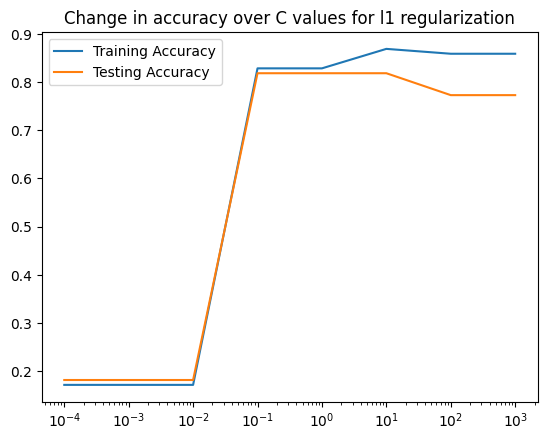

In [18]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed,y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend();
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.8181818181818182,
 0.001: 0.8181818181818182,
 0.01: 0.8181818181818182,
 0.1: 0.8181818181818182,
 1: 0.8181818181818182,
 10: 0.8181818181818182,
 100: 0.8181818181818182,
 1000: 0.7727272727272727}

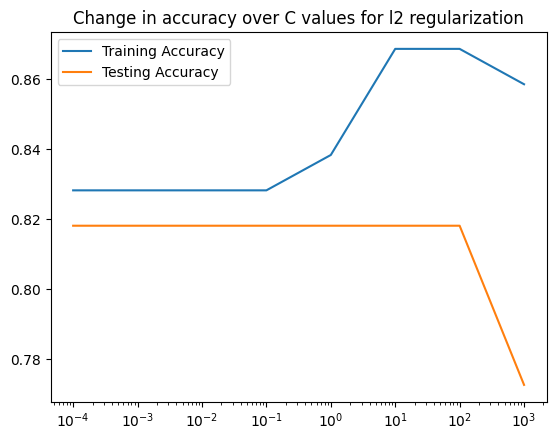

In [19]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed,y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Se probaron ambos tipos de penalizacion para mejorar el resultado del modelo. En vista de que los datos no tienen una alta correlacion, a pesar de que ambas penalizaciones arrojan resultados muy parecidos, se utilizara la penalizacion de l1, ya que la misma es mas apropiada para el fin. 

#### Resultados

In [20]:
# Make an instance of the model
logreg = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l1')
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train_processed,y_train)
#Score
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.8282828282828283
0.8181818181818182


### Modelo Arboles de Decision

In [21]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_tree.fit(X_train_processed, y_train)
y_dec_tree_pred = dec_tree.predict(X_test_processed)
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.8484848484848485
0.8181818181818182


### KNN

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [59]:
max_depth_range = list(range(0, 30))
x = 1
r2 = []

for depth in max_depth_range:
    KnnVal = KNeighborsClassifier(n_neighbors=x)
    KnnVal.fit(X_train_processed, y_train)
    score = KnnVal.score(X_valid_processed, y_val)
    r2.append(score)
    x = x+1

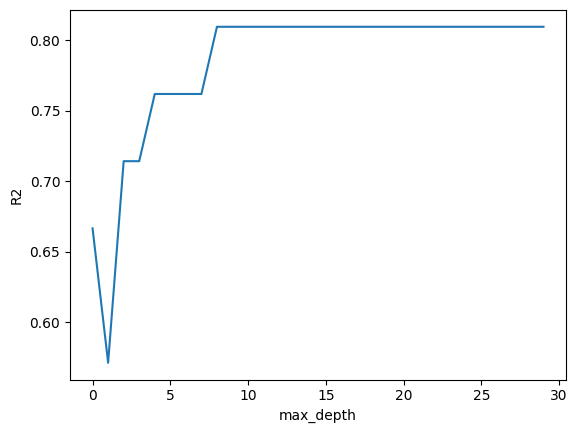

In [24]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_processed, y_train)
knn.score(X_valid_processed, y_val)

0.8095238095238095

In [26]:
y_pred = knn.predict(X_valid_processed)


report = classification_report(y_val, y_pred)
print(report);

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.81      1.00      0.89        17

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


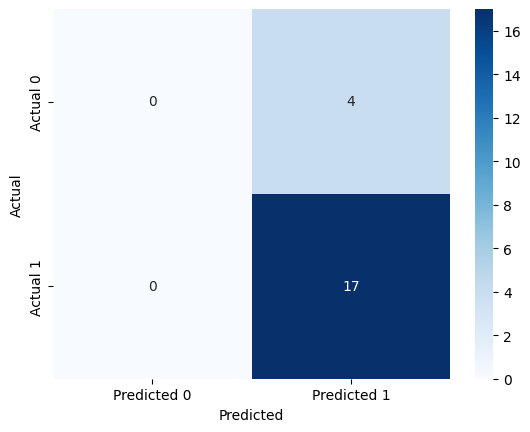

In [27]:
confusion_mat = confusion_matrix(y_val, y_pred)
df_confusion = pd.DataFrame(confusion_mat, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
sns.heatmap(df_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print(knn.score(X_test_processed, y_test))


0.8181818181818182


In [29]:
y_pred = knn.predict(X_test_processed)


report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.82      1.00      0.90        18

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


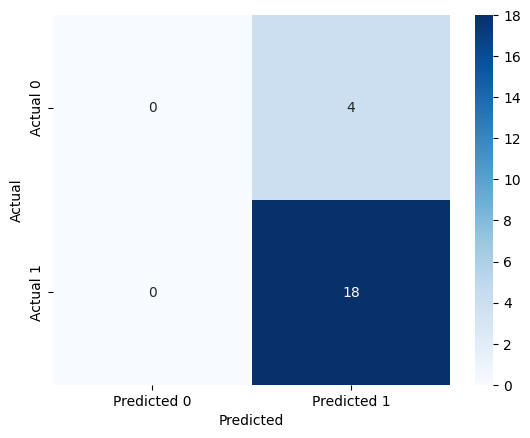

In [30]:
confusion_mat = confusion_matrix(y_test, y_pred)
df_confusion = pd.DataFrame(confusion_mat, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
sns.heatmap(df_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest Classifier

#### Clase RFC

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [105]:
class Models:

    def __init__(self,Xtrain_processed,Xtest_processed, ytrain, ytest):

        self.xtrain = Xtrain_processed
        self.xtest = Xtest_processed
        self.ytrain = ytrain
        self.ytest = ytest

  
    def randomForestModel(self,estimators=100,depth=1):
    
        for inc in range(0,depth):
            
            lgreg = RandomForestClassifier (n_estimators=estimators, max_depth=inc+1, random_state = 42)
            lgreg.fit(self.xtrain,self.ytrain)

            X_train_lg = lgreg.score(self.xtrain, self.ytrain)
            X_test_lg = lgreg.score(self.xtest, self.ytest)
            
            pred = lgreg.predict(self.xtest)
            accuracy = accuracy_score(self.ytest, pred)
            
            cm = confusion_matrix(self.ytest, pred)
            
            classification_r = classification_report(self.ytest, pred)
            print(classification_r)
            
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")           
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

            print('\n************Max depth #',inc+1,'**************')
            print('\nAccuracy :',X_train_lg, '\n')
            print('\nRendimiendo datos de entremaniento:',X_train_lg, '\n')
            print('Rendimiendo datos de prueba:', X_test_lg, '\n')
            # print(' R2 coeficiente de los datos de entrenamiento: ',r2_score(self.ytest, pred),'\n')       para modelos de regresion no de clasificacion
            print('\nMean absolute error: \n',mean_absolute_error(pred,self.ytest))
            print('\nMean squared error: \n',mean_squared_error(pred,self.ytest))
            print('\nResidual sum of squares: \n',mean_squared_error(pred,self.ytest) * len(pred))
            print('\nRoot Mean Squared Error: \n',mean_squared_error(pred,self.ytest, squared=False))
            print('Predicciones de los datos de entrenamiento: \n\n',pred)

        return pred, X_train_lg, X_test_lg, mean_absolute_error(pred,self.ytest), mean_squared_error(pred,self.ytest), (mean_squared_error(pred,self.ytest) * len(pred)), mean_squared_error(pred,self.ytest, squared=False), accuracy
        
    def knn(self,neighbors=1):

        for inc in range(0,neighbors):
            knn =  KNeighborsRegressor(n_neighbors=inc+1)
            knn.fit(self.xtrain, y_train)
            knn_score_train = knn.score(self.xtrain, self.ytrain)
            knn_score_test = knn.score(self.xtest, self.ytest)
            
            knn_predict =  knn.predict(self.xtest)
            knn_accuracy = accuracy_score(self.ytest,knn_predict)
            print('\n************N neighbors #',inc+1,'**************')
            print('\nRendimiendo datos de entremaniento:',knn_score_train, '\n')
            print('Rendimiendo datos de prueba:', knn_score_test, '\n')
            print('Predicciones de los datos de entrenamiento: \n\n',knn_predict)
            print('Precicion de los datos : \n\n',knn_accuracy)

        return knn_predict

chooseModel = Models(X_train_processed,X_test_processed, y_train, y_test)

#### Random Forest Classifier RESULTS

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.82      1.00      0.90        18

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


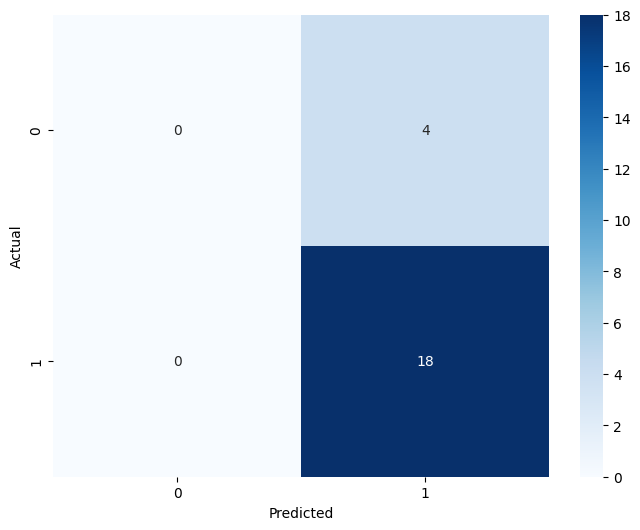


************Max depth # 1 **************

Accuracy : 0.8282828282828283 


Rendimiendo datos de entremaniento: 0.8282828282828283 

Rendimiendo datos de prueba: 0.8181818181818182 


Mean absolute error: 
 0.18181818181818182

Mean squared error: 
 0.18181818181818182

Residual sum of squares: 
 4.0

Root Mean Squared Error: 
 0.4264014327112209
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.82      1.00      0.90        18

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


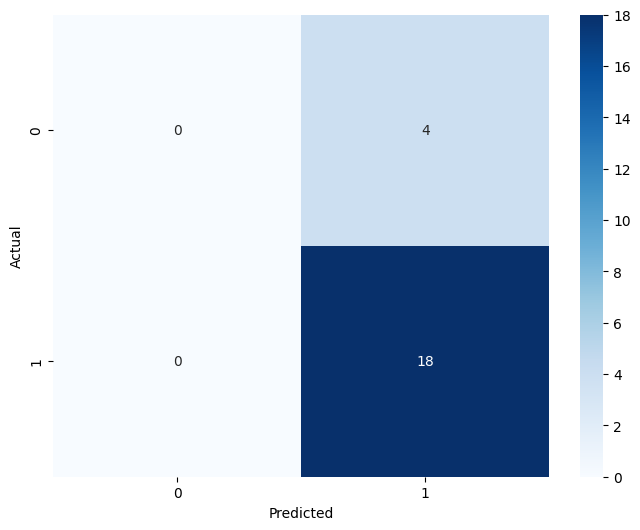


************Max depth # 2 **************

Accuracy : 0.8282828282828283 


Rendimiendo datos de entremaniento: 0.8282828282828283 

Rendimiendo datos de prueba: 0.8181818181818182 


Mean absolute error: 
 0.18181818181818182

Mean squared error: 
 0.18181818181818182

Residual sum of squares: 
 4.0

Root Mean Squared Error: 
 0.4264014327112209
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.82      1.00      0.90        18

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


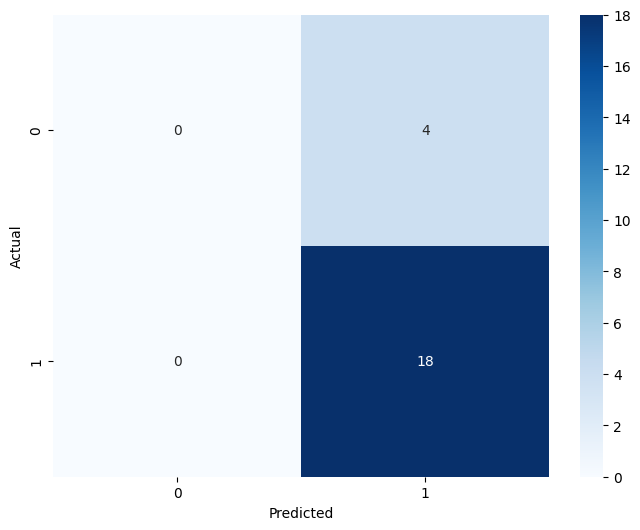


************Max depth # 3 **************

Accuracy : 0.8282828282828283 


Rendimiendo datos de entremaniento: 0.8282828282828283 

Rendimiendo datos de prueba: 0.8181818181818182 


Mean absolute error: 
 0.18181818181818182

Mean squared error: 
 0.18181818181818182

Residual sum of squares: 
 4.0

Root Mean Squared Error: 
 0.4264014327112209
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.82      1.00      0.90        18

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


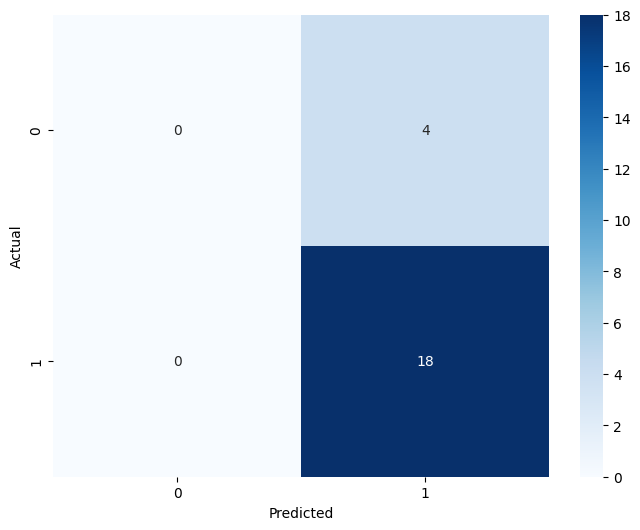


************Max depth # 4 **************

Accuracy : 0.8282828282828283 


Rendimiendo datos de entremaniento: 0.8282828282828283 

Rendimiendo datos de prueba: 0.8181818181818182 


Mean absolute error: 
 0.18181818181818182

Mean squared error: 
 0.18181818181818182

Residual sum of squares: 
 4.0

Root Mean Squared Error: 
 0.4264014327112209
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.82      1.00      0.90        18

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


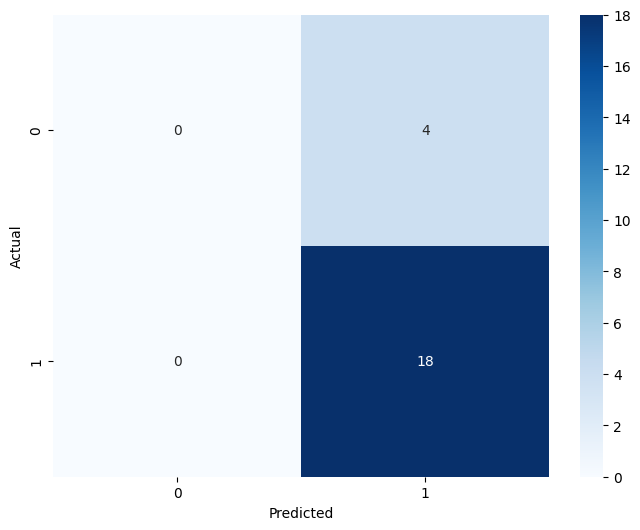


************Max depth # 5 **************

Accuracy : 0.8484848484848485 


Rendimiendo datos de entremaniento: 0.8484848484848485 

Rendimiendo datos de prueba: 0.8181818181818182 


Mean absolute error: 
 0.18181818181818182

Mean squared error: 
 0.18181818181818182

Residual sum of squares: 
 4.0

Root Mean Squared Error: 
 0.4264014327112209
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.81      0.94      0.87        18

    accuracy                           0.77        22
   macro avg       0.40      0.47      0.44        22
weighted avg       0.66      0.77      0.71        22



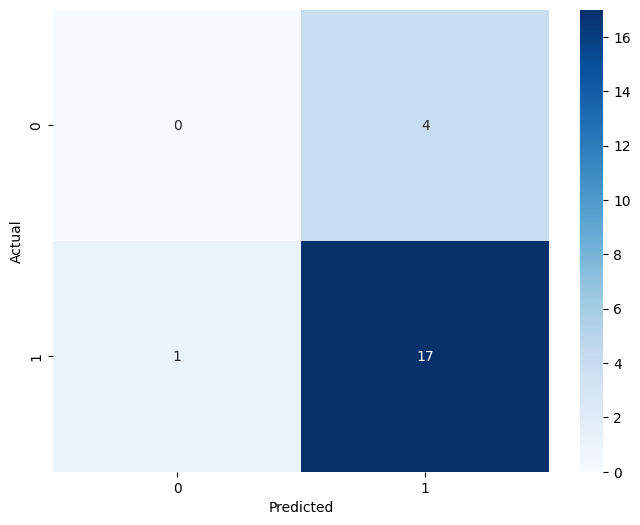


************Max depth # 6 **************

Accuracy : 0.9090909090909091 


Rendimiendo datos de entremaniento: 0.9090909090909091 

Rendimiendo datos de prueba: 0.7727272727272727 


Mean absolute error: 
 0.22727272727272727

Mean squared error: 
 0.22727272727272727

Residual sum of squares: 
 5.0

Root Mean Squared Error: 
 0.4767312946227962
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.81      0.94      0.87        18

    accuracy                           0.77        22
   macro avg       0.40      0.47      0.44        22
weighted avg       0.66      0.77      0.71        22



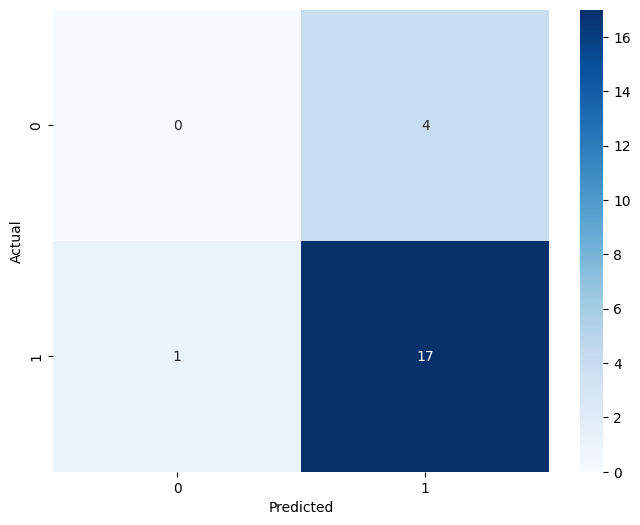


************Max depth # 7 **************

Accuracy : 0.9090909090909091 


Rendimiendo datos de entremaniento: 0.9090909090909091 

Rendimiendo datos de prueba: 0.7727272727272727 


Mean absolute error: 
 0.22727272727272727

Mean squared error: 
 0.22727272727272727

Residual sum of squares: 
 5.0

Root Mean Squared Error: 
 0.4767312946227962
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.81      0.94      0.87        18

    accuracy                           0.77        22
   macro avg       0.40      0.47      0.44        22
weighted avg       0.66      0.77      0.71        22



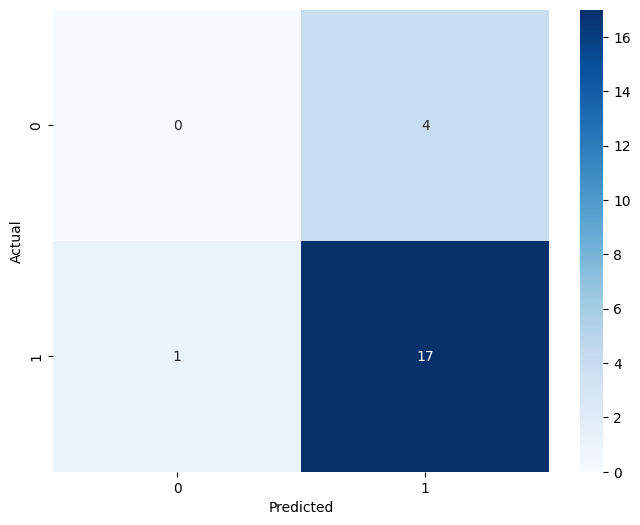


************Max depth # 8 **************

Accuracy : 0.9090909090909091 


Rendimiendo datos de entremaniento: 0.9090909090909091 

Rendimiendo datos de prueba: 0.7727272727272727 


Mean absolute error: 
 0.22727272727272727

Mean squared error: 
 0.22727272727272727

Residual sum of squares: 
 5.0

Root Mean Squared Error: 
 0.4767312946227962
Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [94]:
pred, performance_Xtrain, performance_Xtest, meanAbsoluteError, meanEquaredError, nResidual, RootMeanSquaredError, accuracy = chooseModel.randomForestModel(100,8)

## Resultados de Modelos

In [46]:
modelos =  pd.DataFrame(data=[["KNN",knn.score(X_test_processed, y_test), 5.1021,"n_neighbors=10"],
                             ["Random Forest Classifier",0.90909, 1.2041, "n_stimador = 100, max_depth = 8, random_state = 42"],
                             ["Decision Tree Classifier",test_score, 4.9829,"random_state = 42, max_depth=2"],
                         
                              ["Modelos Regresion Logistica",logreg_pipe.score(X_test_processed, y_test), 5.0783, "C=c, max_iter=1000, solver=liblinear, penalty=l1"]], columns=["Modelo", "Score","Tiempo ejecucion", "Hyperparametros"])
modelos.head()

,Modelo,Score,Tiempo ejecucion,Hyperparametros
0,KNN,0.818182,5.1021,n_neighbors=10
1,Random Forest Classifier,0.909090,1.2041,"n_stimador = 100, max_depth = 8, random_state ..."
2,Decision Tree Classifier,0.818182,4.9829,"random_state = 42, max_depth=2"
3,Modelos Regresion Logistica,0.818182,5.0783,"C=c, max_iter=1000, solver=liblinear, penalty=l1"


In [ ]:
import time
#randomForestClassifier 1.2041
#knn   5.1021
# Modelo Arboles de Decision 4.9829
# LogisticRegression 5.0783

In [41]:


# Define el temporizador
start_time = time.time()

logreg

end_time = time.time()
elapsed_time = end_time - start_time

# Muestra los resultados

print("Tiempo de ejecución:", elapsed_time, "segundos")

Tiempo de ejecución: 5.078315734863281e-05 segundos
